In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from pysankey import sankey
import anndata
import seaborn as sns


## Data Pre Processing

In [2]:
adata = anndata.read_h5ad('../data/aa_aligned_adata_sc.h5ad')

In [3]:
# Subset data to be only shared clonotypes seen in the pre& post condition in CD4 cells:

#first subset data to CD4 cells only:
cd4 = adata[adata.obs['fine_clustering'].isin(['CD4_Tnaive','CD4_Tcm','CD4_Treg','CD4_Tem'])].copy()

In [4]:
#Get shared clonotypes, clonotype ids must be in pre and post
shared_clonos = pd.merge(cd4.obs['cc_aa_alignment'][cd4.obs['timepoint']== 'pre'],
                          cd4.obs['cc_aa_alignment'][cd4.obs['timepoint']== 'post'], 
                          how='inner')
shared_clonos = shared_clonos['cc_aa_alignment'].unique()

In [5]:
#Subset cd4s to shared clonos:
shared_cd4s = cd4[cd4.obs['cc_aa_alignment'].isin(shared_clonos)].copy()

## Treatment Saline

In [6]:
#Construct data frame to hold data
saline = pd.DataFrame()
saline['pre_type'] = ""
saline['pre_clono'] = ""
saline['pre_clono_cells'] = 0
# df['pre_clono_weight'] = 0.0

saline['post_type'] = ""
saline['post_clono'] = ""
saline['post_clono_cells'] = 0
# df['post_clono_weight'] = 0.0

saline['pre_type'].astype(str)
saline['pre_clono'].astype(str)
saline['pre_clono_cells'].astype(int)
# df['pre_clono_weight'].astype(float)

saline['post_type'].astype(str)
saline['post_clono'].astype(str)
saline['post_clono_cells'].astype(int)
# df['post_clono_weight'].astype(float)

Series([], Name: post_clono_cells, dtype: int64)

In [7]:
# count clonotypes and number of cells:
saline = pd.DataFrame()
for i in shared_clonos:
    ## TREGS
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)


    ## T Naive
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)


    ## T Central Memory
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)


    ## T Effector Memory
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='Saline')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='Saline')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    saline = pd.concat([saline, tmp], ignore_index=True)

In [8]:
saline = saline[saline['pre_clono_cells'] != 0]
saline = saline[saline['post_clono_cells'] != 0]

## Treatment 1.5MIU

In [9]:
#Construct data frame to hold data
T15 = pd.DataFrame()
T15['pre_type'] = ""
T15['pre_clono'] = ""
T15['pre_clono_cells'] = 0
# df['pre_clono_weight'] = 0.0

T15['post_type'] = ""
T15['post_clono'] = ""
T15['post_clono_cells'] = 0
# df['post_clono_weight'] = 0.0

T15['pre_type'].astype(str)
T15['pre_clono'].astype(str)
T15['pre_clono_cells'].astype(int)
# df['pre_clono_weight'].astype(float)

T15['post_type'].astype(str)
T15['post_clono'].astype(str)
T15['post_clono_cells'].astype(int)
# df['post_clono_weight'].astype(float)

Series([], Name: post_clono_cells, dtype: int64)

In [10]:
# count clonotypes and number of cells:
T15 = pd.DataFrame()
for i in shared_clonos:
    ## TREGS
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)


    ## T Naive
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)


    ## T Central Memory
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)


    ## T Effector Memory
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='1.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='1.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T15 = pd.concat([T15, tmp], ignore_index=True)

In [11]:
T15 = T15[T15['pre_clono_cells'] != 0]
T15 = T15[T15['post_clono_cells'] != 0]

## Treatment 2.5MIU

In [12]:
#Construct data frame to hold data
T25 = pd.DataFrame()
T25['pre_type'] = ""
T25['pre_clono'] = ""
T25['pre_clono_cells'] = 0
# df['pre_clono_weight'] = 0.0

T25['post_type'] = ""
T25['post_clono'] = ""
T25['post_clono_cells'] = 0
# df['post_clono_weight'] = 0.0

T25['pre_type'].astype(str)
T25['pre_clono'].astype(str)
T25['pre_clono_cells'].astype(int)
# df['pre_clono_weight'].astype(float)

T25['post_type'].astype(str)
T25['post_clono'].astype(str)
T25['post_clono_cells'].astype(int)
# df['post_clono_weight'].astype(float)

Series([], Name: post_clono_cells, dtype: int64)

In [13]:
# count clonotypes and number of cells:
T25 = pd.DataFrame()
for i in shared_clonos:
    ## TREGS
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Regs', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)


    ## T Naive
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Naive', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)


    ## T Central Memory
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Central Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)


    ## T Effector Memory
    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Effector Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Treg') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Regs', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tnaive') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Naive', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

    # i = clone id, a = pre count for specific cell with clone id (i), b = post count for specific cell wth  clone id (i)
    a = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tem') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='pre') & (adata.obs['treatment']=='2.5MIU')])
    b = len(adata.obs['fine_clustering'][(adata.obs['fine_clustering']=='CD4_Tcm') & (adata.obs['cc_aa_alignment']==i) & (adata.obs['timepoint']=='post') & (adata.obs['treatment']=='2.5MIU')])
    tmp = pd.DataFrame({'pre_type':'T Effector Memory', 'pre_clono':i, 'pre_clono_cells':a, 'post_type':'T Central Memory', 'post_clono':i, 'post_clono_cells':b}, index=[0])
    T25 = pd.concat([T25, tmp], ignore_index=True)

In [14]:
T25 = T25[T25['pre_clono_cells'] != 0]
T25 = T25[T25['post_clono_cells'] != 0]

In [15]:
df=T15

In [16]:
# Adjusting pre_clono_cells
pre_count_df = df.groupby(['pre_clono', 'pre_type']).size().reset_index(name='pre_count')
df = df.merge(pre_count_df, on=['pre_clono', 'pre_type'])
df['adjusted_pre_clono_cells'] = df['pre_clono_cells'] / df['pre_count']
df = df.drop(columns=['pre_count'])

# Adjusting post_clono_cells
post_count_df = df.groupby(['post_clono', 'post_type']).size().reset_index(name='post_count')
df = df.merge(post_count_df, on=['post_clono', 'post_type'])
df['adjusted_post_clono_cells'] = df['post_clono_cells'] / df['post_count']
df = df.drop(columns=['post_count'])

In [17]:
T15_updated = df
df = T25

In [18]:
# Adjusting pre_clono_cells
pre_count_df = df.groupby(['pre_clono', 'pre_type']).size().reset_index(name='pre_count')
df = df.merge(pre_count_df, on=['pre_clono', 'pre_type'])
df['adjusted_pre_clono_cells'] = df['pre_clono_cells'] / df['pre_count']
df = df.drop(columns=['pre_count'])

# Adjusting post_clono_cells
post_count_df = df.groupby(['post_clono', 'post_type']).size().reset_index(name='post_count')
df = df.merge(post_count_df, on=['post_clono', 'post_type'])
df['adjusted_post_clono_cells'] = df['post_clono_cells'] / df['post_count']
df = df.drop(columns=['post_count'])

In [19]:
T25_updated = df
df = saline

In [20]:
# Adjusting pre_clono_cells
pre_count_df = df.groupby(['pre_clono', 'pre_type']).size().reset_index(name='pre_count')
df = df.merge(pre_count_df, on=['pre_clono', 'pre_type'])
df['adjusted_pre_clono_cells'] = df['pre_clono_cells'] / df['pre_count']
df = df.drop(columns=['pre_count'])

# Adjusting post_clono_cells
post_count_df = df.groupby(['post_clono', 'post_type']).size().reset_index(name='post_count')
df = df.merge(post_count_df, on=['post_clono', 'post_type'])
df['adjusted_post_clono_cells'] = df['post_clono_cells'] / df['post_count']
df = df.drop(columns=['post_count'])

In [21]:
Saline_updated = df

## Sankey Plots:

In [22]:
# define colours and transparency for sankey plots:
color_dict = {
    'Empty':'#000000',
    'T Effector Memory': '#B65BCD',
    'T Central Memory': '#E55C5C',
    'T Naive': '#5AB67E',
    'T Regs': '#74A1C6',
    ('T Regs', 'T Regs'): '#74A1C6',
}


alpha_dict = {
    'Empty':1,
    'T Effector Memory': 0.1,
    'T Central Memory': 0.1,
    'T Naive': 0.1,
    'T Regs': 0.35,
    ('T Regs', 'T Regs'): 1,
}

In [23]:
#Add Extra columns to sort the order of cells to ensure T Regs are at the top visually:
Saline_updated['sort_a'] = 'b'
Saline_updated['sort_b'] = 'b'

Saline_updated.loc[(Saline_updated['pre_type'] == 'T Regs'), 'sort_a'] = 'z'
Saline_updated.loc[(Saline_updated['post_type'] == 'T Regs'), 'sort_b'] = 'z'

Saline_updated.sort_values(['sort_a','sort_b'], inplace=True)

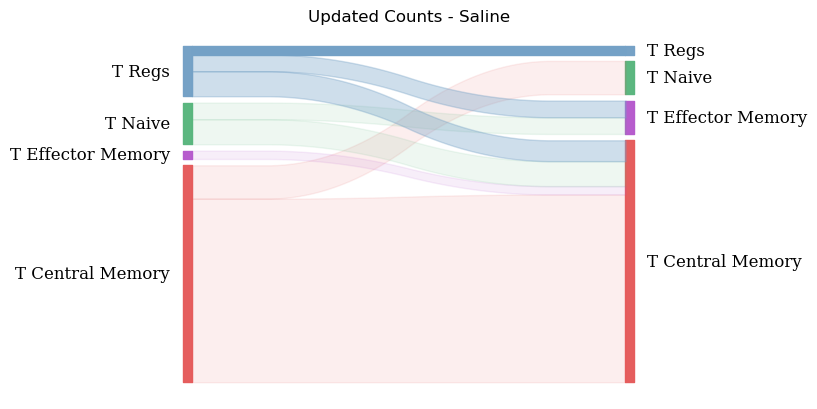

In [24]:
ax = plt.axes()
sankey(
        left=Saline_updated['pre_type'].values[0:], 
        leftWeight=Saline_updated['adjusted_pre_clono_cells'].values[0:],
        

        right=Saline_updated['post_type'].values[0:], 
        rightWeight=Saline_updated['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts - Saline")

plt.show()

In [25]:
df = Saline_updated
# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('Saline Summary Table')


,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,26,68.42%,29,76.32%
1,T Effector Memory,1,2.63%,4,10.53%
2,T Naive,5,13.16%,4,10.53%
3,T Regs,6,15.79%,1,2.63%


In [26]:
#Add Extra columns to sort the order of cells to ensure T Regs are at the top visually:
T15_updated['sort_a'] = 'b'
T15_updated['sort_b'] = 'b'

T15_updated.loc[(T15_updated['pre_type'] == 'T Regs'), 'sort_a'] = 'z'
T15_updated.loc[(T15_updated['post_type'] == 'T Regs'), 'sort_b'] = 'z'

T15_updated.sort_values(['sort_a','sort_b'], inplace=True)

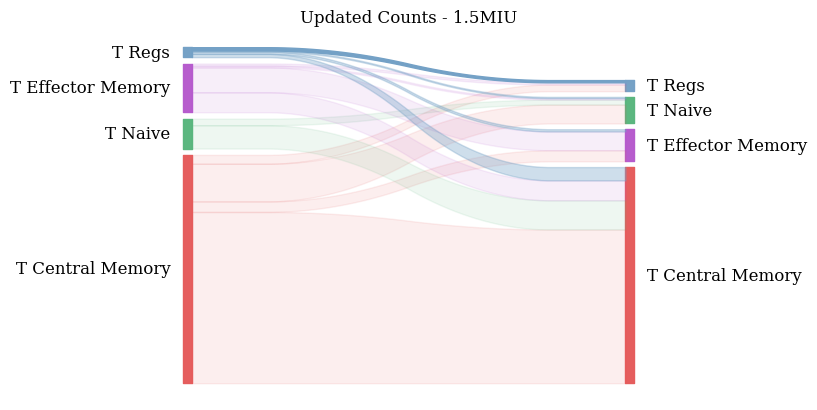

In [27]:
ax = plt.axes()
sankey(
        left=T15_updated['pre_type'].values[0:], 
        leftWeight=T15_updated['adjusted_pre_clono_cells'].values[0:],
        

        right=T15_updated['post_type'].values[0:], 
        rightWeight=T15_updated['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts - 1.5MIU")

plt.show()

In [28]:
print("%s total cells in pre" % T15_updated['adjusted_pre_clono_cells'].sum())
print("%s total cells in post" % T15_updated['adjusted_post_clono_cells'].sum())

286.0 total cells in pre
258.0 total cells in post


In [29]:
df = T15_updated
# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('1.5MIU Dose Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,206,72.03%,195,75.58%
1,T Effector Memory,44,15.38%,29,11.24%
2,T Naive,27,9.44%,24,9.3%
3,T Regs,9,3.15%,10,3.88%


In [30]:
#Add Extra columns to sort the order of cells to ensure T Regs are at the top visually:
T25_updated['sort_a'] = 'b'
T25_updated['sort_b'] = 'b'

T25_updated.loc[(T25_updated['pre_type'] == 'T Regs'), 'sort_a'] = 'z'
T25_updated.loc[(T25_updated['post_type'] == 'T Regs'), 'sort_b'] = 'z'

T25_updated.sort_values(['sort_a','sort_b'], inplace=True)

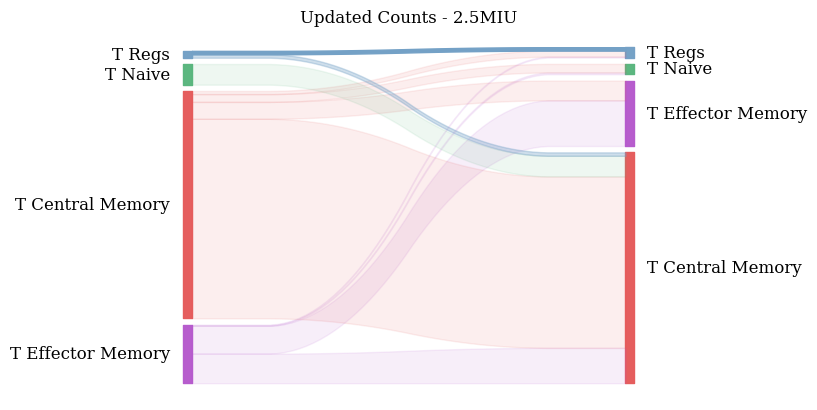

In [31]:
ax = plt.axes()
sankey(
        left=T25_updated['pre_type'].values[0:], 
        leftWeight=T25_updated['adjusted_pre_clono_cells'].values[0:],
        

        right=T25_updated['post_type'].values[0:], 
        rightWeight=T25_updated['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts - 2.5MIU")

plt.show()

In [32]:
print("%s total cells in pre" % T25_updated['adjusted_pre_clono_cells'].sum())
print("%s total cells in post" % T25_updated['adjusted_post_clono_cells'].sum())

182.0 total cells in pre
184.0 total cells in post


In [33]:
df = T25_updated
# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('2.5MIU Dose Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,132,72.53%,134,72.83%
1,T Effector Memory,34,18.68%,38,20.65%
2,T Naive,12,6.59%,6,3.26%
3,T Regs,4,2.2%,6,3.26%


## Sankey with Tregs only:

In [34]:
Saline_regs_ids = Saline_updated[Saline_updated['pre_type'] == 'T Regs']['pre_clono'].unique().astype(list)
Saline_regs_ids

array(['14973', '14999', '18073', '18247', '18565', '503'], dtype=object)

In [35]:
# Get the list of unique pre_clonos containing T Reg cells
Saline_regs_pre_ids = Saline_updated[['pre_clono']][Saline_updated['pre_type'] == 'T Regs']['pre_clono'].unique()

# Get the list of unique post_clonos containing T Reg cells
Saline_regs_post_ids = Saline_updated[Saline_updated['post_type'] == 'T Regs']['post_clono'].unique()

# Get the list of unique pre_clonos containing T Reg cells
T15_regs_pre_ids = T15_updated[T15_updated['pre_type'] == 'T Regs']['pre_clono'].unique()

# Get the list of unique post_clonos containing T Reg cells
T15_regs_post_ids = T15_updated[T15_updated['post_type'] == 'T Regs']['post_clono'].unique()

# Get the list of unique pre_clonos containing T Reg cells
T25_regs_pre_ids = T25_updated[T25_updated['pre_type'] == 'T Regs']['pre_clono'].unique()

# Get the list of unique post_clonos containing T Reg cells
T25_regs_post_ids = T25_updated[T25_updated['post_type'] == 'T Regs']['post_clono'].unique()

In [36]:
Saline_regs = Saline_updated[(Saline_updated['pre_clono'].isin(Saline_regs_pre_ids)) | (Saline_updated['post_clono'].isin(Saline_regs_post_ids))]
T15_regs = T15_updated[(T15_updated['pre_clono'].isin(T15_regs_pre_ids)) | (T15_updated['post_clono'].isin(T15_regs_post_ids))]
T25_regs = T25_updated[(T25_updated['pre_clono'].isin(T25_regs_pre_ids)) | (T25_updated['post_clono'].isin(T25_regs_post_ids))]

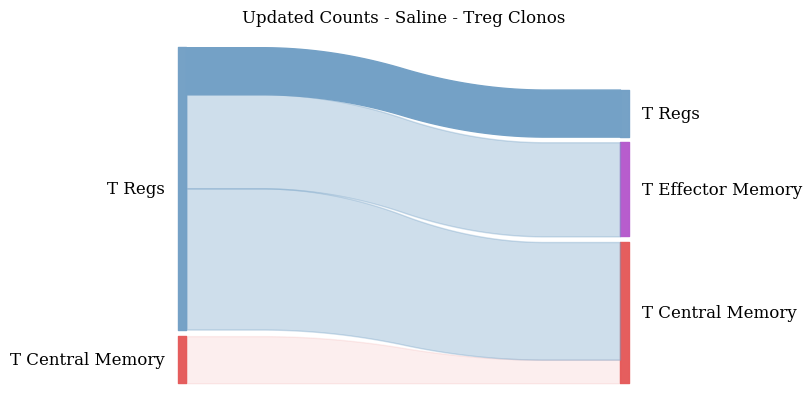

In [37]:
ax = plt.axes()
sankey(
        left=Saline_regs['pre_type'].values[0:], 
        leftWeight=Saline_regs['adjusted_pre_clono_cells'].values[0:],
        

        right=Saline_regs['post_type'].values[0:], 
        rightWeight=Saline_regs['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts - Saline - Treg Clonos")

plt.show()

In [38]:
df = Saline_regs
# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('Saline Dose Treg Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,1,14.29%,3,50.0%
1,nan,nan,nan%,2,33.33%
2,T Regs,6,85.71%,1,16.67%


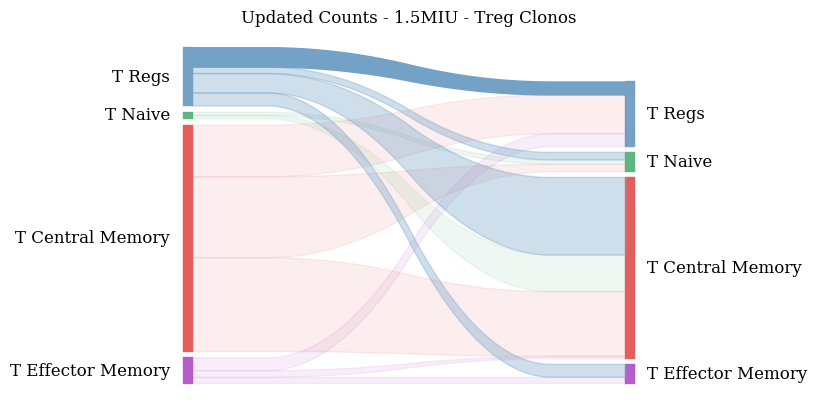

In [39]:
ax = plt.axes()
sankey(
        left=T15_regs['pre_type'].values[0:], 
        leftWeight=T15_regs['adjusted_pre_clono_cells'].values[0:],
        

        right=T15_regs['post_type'].values[0:], 
        rightWeight=T15_regs['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts - 1.5MIU - Treg Clonos")

plt.show()

In [40]:
df = T15_regs
# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('1.5 Dose Treg Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,35,71.43%,28,63.64%
1,T Effector Memory,4,8.16%,3,6.82%
2,T Naive,1,2.04%,3,6.82%
3,T Regs,9,18.37%,10,22.73%


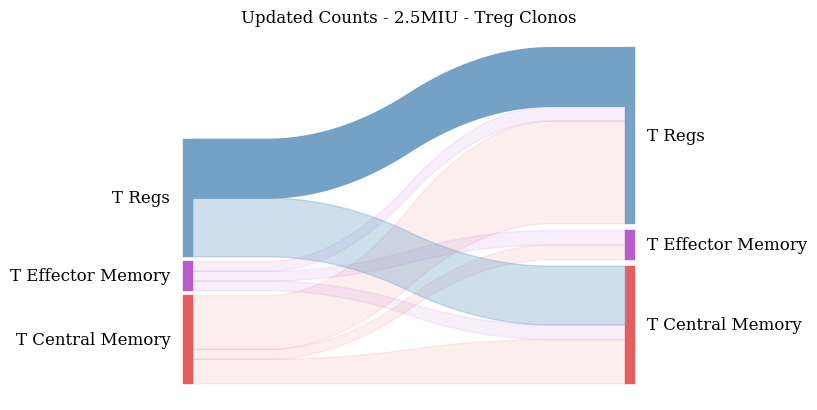

In [41]:
ax = plt.axes()
sankey(
        left=T25_regs['pre_type'].values[0:], 
        leftWeight=T25_regs['adjusted_pre_clono_cells'].values[0:],
        

        right=T25_regs['post_type'].values[0:], 
        rightWeight=T25_regs['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts - 2.5MIU - Treg Clonos")

plt.show()

In [42]:
df = T25_regs
# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('2.5 Dose Treg Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,3,37.5%,4,36.36%
1,T Effector Memory,1,12.5%,1,9.09%
2,T Regs,4,50.0%,6,54.55%


In [43]:
# #Output Data to check 
# Saline_updated.to_csv('Updated_Saline.csv')
# T15_updated.to_csv('Updated_T15.csv')
# T25_updated.to_csv('Updated_T25.csv')

## Proportions Data

In [44]:
# Now represent as a proportion

# Add new columns representing the proportions
Saline_updated['proportion_pre_clono_cells'] = Saline_updated['adjusted_pre_clono_cells'] / Saline_updated['adjusted_pre_clono_cells'].sum()
Saline_updated['proportion_post_clono_cells'] = Saline_updated['adjusted_post_clono_cells'] / Saline_updated['adjusted_post_clono_cells'].sum()

T15_updated['proportion_pre_clono_cells'] = T15_updated['adjusted_pre_clono_cells'] / T15_updated['adjusted_pre_clono_cells'].sum()
T15_updated['proportion_post_clono_cells'] = T15_updated['adjusted_post_clono_cells'] / T15_updated['adjusted_post_clono_cells'].sum()

T25_updated['proportion_pre_clono_cells'] = T25_updated['adjusted_pre_clono_cells'] / T25_updated['adjusted_pre_clono_cells'].sum()
T25_updated['proportion_post_clono_cells'] = T25_updated['adjusted_post_clono_cells'] / T25_updated['adjusted_post_clono_cells'].sum()


In [45]:
#Update sorting info to ensure make plots consistent:
Saline_updated.loc[(Saline_updated['pre_type'] == 'T Regs'), 'sort_a'] = 'z'
Saline_updated.loc[(Saline_updated['post_type'] == 'T Regs'), 'sort_b'] = 'z'
Saline_updated.loc[(Saline_updated['pre_type'] == 'T Naive'), 'sort_a'] = 'w'
Saline_updated.loc[(Saline_updated['post_type'] == 'T Naive'), 'sort_b'] = 'w'
Saline_updated.loc[(Saline_updated['pre_type'] == 'T Effector Memory'), 'sort_a'] = 'x'
Saline_updated.loc[(Saline_updated['post_type'] == 'T Effector Memory'), 'sort_b'] = 'x'
Saline_updated.loc[(Saline_updated['pre_type'] == 'T Central Memory'), 'sort_a'] = 'y'
Saline_updated.loc[(Saline_updated['post_type'] == 'T Central Memory'), 'sort_b'] = 'y'
Saline_updated.sort_values(['sort_a','sort_b'], inplace=True)

#Update sorting info to ensure make plots consistent:
T15_updated.loc[(T15_updated['pre_type'] == 'T Regs'), 'sort_a'] = 'z'
T15_updated.loc[(T15_updated['post_type'] == 'T Regs'), 'sort_b'] = 'z'
T15_updated.loc[(T15_updated['pre_type'] == 'T Naive'), 'sort_a'] = 'w'
T15_updated.loc[(T15_updated['post_type'] == 'T Naive'), 'sort_b'] = 'w'
T15_updated.loc[(T15_updated['pre_type'] == 'T Effector Memory'), 'sort_a'] = 'x'
T15_updated.loc[(T15_updated['post_type'] == 'T Effector Memory'), 'sort_b'] = 'x'
T15_updated.loc[(T15_updated['pre_type'] == 'T Central Memory'), 'sort_a'] = 'y'
T15_updated.loc[(T15_updated['post_type'] == 'T Central Memory'), 'sort_b'] = 'y'
T15_updated.sort_values(['sort_a','sort_b'], inplace=True)

#Update sorting info to ensure make plots consistent:
T25_updated.loc[(T25_updated['pre_type'] == 'T Regs'), 'sort_a'] = 'z'
T25_updated.loc[(T25_updated['post_type'] == 'T Regs'), 'sort_b'] = 'z'
T25_updated.loc[(T25_updated['pre_type'] == 'T Naive'), 'sort_a'] = 'w'
T25_updated.loc[(T25_updated['post_type'] == 'T Naive'), 'sort_b'] = 'w'
T25_updated.loc[(T25_updated['pre_type'] == 'T Effector Memory'), 'sort_a'] = 'x'
T25_updated.loc[(T25_updated['post_type'] == 'T Effector Memory'), 'sort_b'] = 'x'
T25_updated.loc[(T25_updated['pre_type'] == 'T Central Memory'), 'sort_a'] = 'y'
T25_updated.loc[(T25_updated['post_type'] == 'T Central Memory'), 'sort_b'] = 'y'
T25_updated.sort_values(['sort_a','sort_b'], inplace=True)

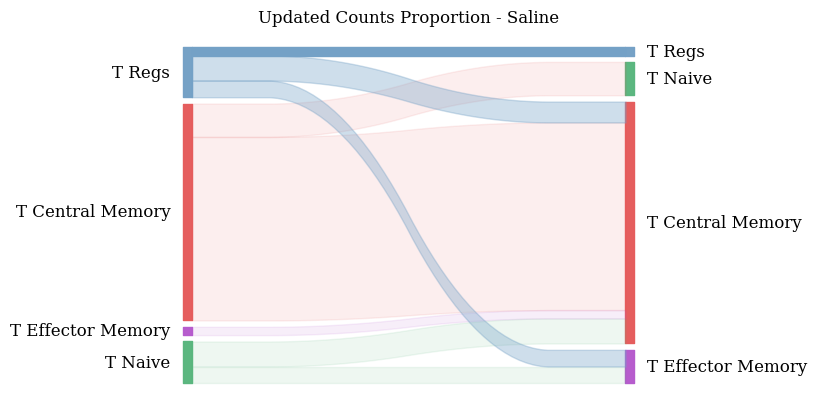

In [46]:
ax = plt.axes()
sankey(
        left=Saline_updated['pre_type'].values[0:], 
        leftWeight=Saline_updated['proportion_pre_clono_cells'].values[0:],
        

        right=Saline_updated['post_type'].values[0:], 
        rightWeight=Saline_updated['proportion_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts Proportion - Saline")

plt.show()

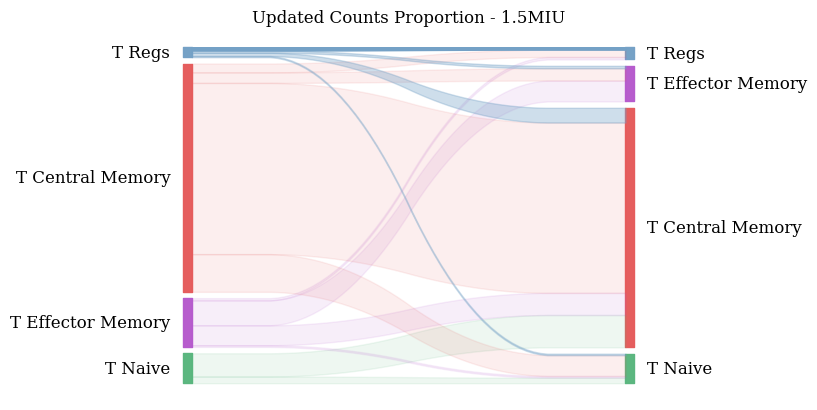

In [47]:
ax = plt.axes()
sankey(
        left=T15_updated['pre_type'].values[0:], 
        leftWeight=T15_updated['proportion_pre_clono_cells'].values[0:],
        

        right=T15_updated['post_type'].values[0:], 
        rightWeight=T15_updated['proportion_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts Proportion - 1.5MIU")

plt.show()

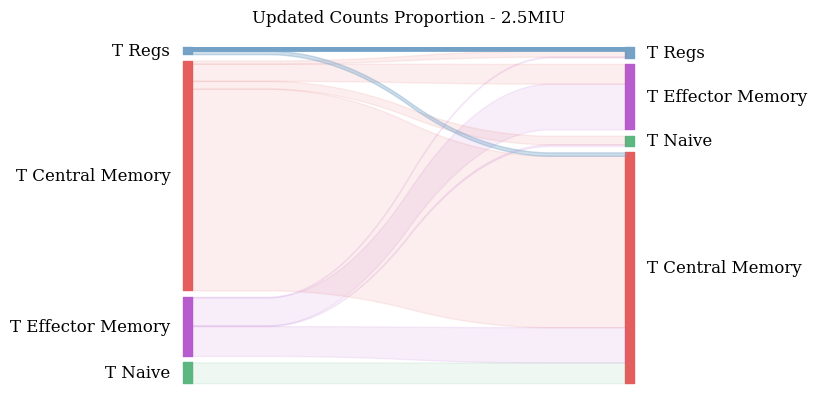

In [48]:
ax = plt.axes()
sankey(
        left=T25_updated['pre_type'].values[0:], 
        leftWeight=T25_updated['proportion_pre_clono_cells'].values[0:],
        

        right=T25_updated['post_type'].values[0:], 
        rightWeight=T25_updated['proportion_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts Proportion - 2.5MIU")

plt.show()

In [49]:
Saline_regs = Saline_updated[(Saline_updated['pre_clono'].isin(Saline_regs_pre_ids)) | (Saline_updated['post_clono'].isin(Saline_regs_post_ids))]
T15_regs = T15_updated[(T15_updated['pre_clono'].isin(T15_regs_pre_ids)) | (T15_updated['post_clono'].isin(T15_regs_post_ids))]
T25_regs = T25_updated[(T25_updated['pre_clono'].isin(T25_regs_pre_ids)) | (T25_updated['post_clono'].isin(T25_regs_post_ids))]

In [50]:
Saline_regs['proportion_pre_clono_cells'] = Saline_regs['adjusted_pre_clono_cells'] / Saline_regs['adjusted_pre_clono_cells'].sum()
Saline_regs['proportion_post_clono_cells'] = Saline_regs['adjusted_post_clono_cells'] / Saline_regs['adjusted_post_clono_cells'].sum()

T15_regs['proportion_pre_clono_cells'] = T15_regs['adjusted_pre_clono_cells'] / T15_regs['adjusted_pre_clono_cells'].sum()
T15_regs['proportion_post_clono_cells'] = T15_regs['adjusted_post_clono_cells'] / T15_regs['adjusted_post_clono_cells'].sum()

T25_regs['proportion_pre_clono_cells'] = T25_regs['adjusted_pre_clono_cells'] / T25_regs['adjusted_pre_clono_cells'].sum()
T25_regs['proportion_post_clono_cells'] = T25_regs['adjusted_post_clono_cells'] / T25_regs['adjusted_post_clono_cells'].sum()


/var/folders/t4/bfhrb57j3tz05cxtdm7p442h0000gn/T/ipykernel_4743/4280921397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Saline_regs['proportion_pre_clono_cells'] = Saline_regs['adjusted_pre_clono_cells'] / Saline_regs['adjusted_pre_clono_cells'].sum()
/var/folders/t4/bfhrb57j3tz05cxtdm7p442h0000gn/T/ipykernel_4743/4280921397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Saline_regs['proportion_post_clono_cells'] = Saline_regs['adjusted_post_clono_cells'] / Saline_regs['adjusted_post_clono_cells

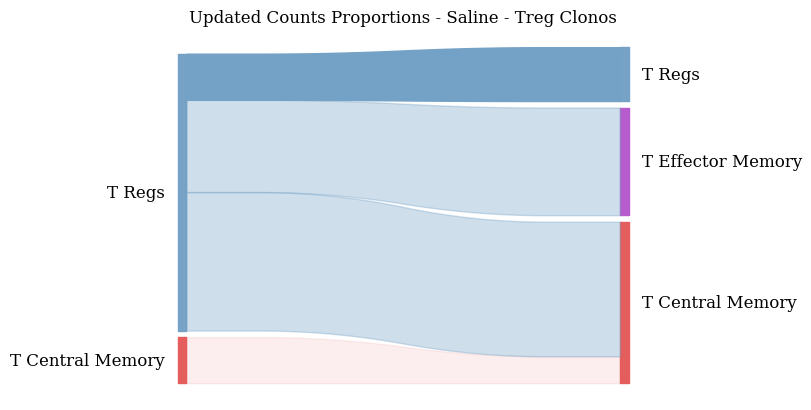

In [51]:
ax = plt.axes()
sankey(
        left=Saline_regs['pre_type'].values[0:], 
        leftWeight=Saline_regs['proportion_pre_clono_cells'].values[0:],
        

        right=Saline_regs['post_type'].values[0:], 
        rightWeight=Saline_regs['proportion_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts Proportions - Saline - Treg Clonos")

plt.show()

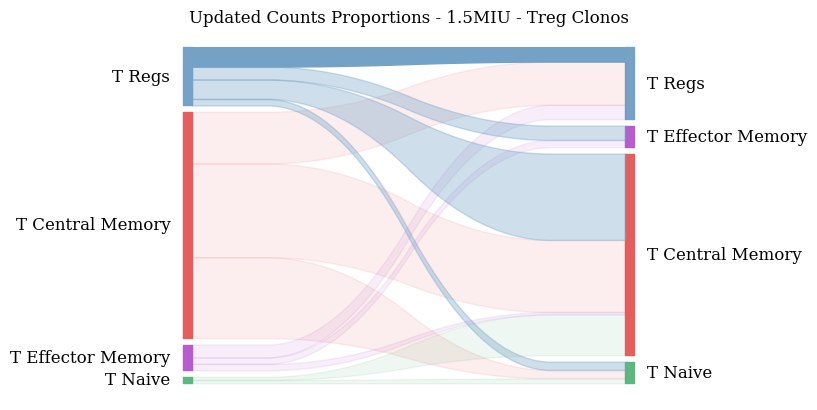

In [52]:
ax = plt.axes()
sankey(
        left=T15_regs['pre_type'].values[0:], 
        leftWeight=T15_regs['proportion_pre_clono_cells'].values[0:],
        

        right=T15_regs['post_type'].values[0:], 
        rightWeight=T15_regs['proportion_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts Proportions - 1.5MIU - Treg Clonos")

plt.show()

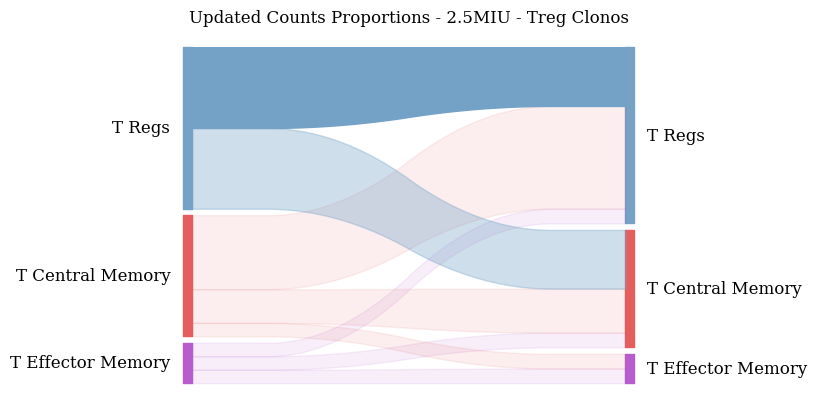

In [53]:
ax = plt.axes()
sankey(
        left=T25_regs['pre_type'].values[0:], 
        leftWeight=T25_regs['proportion_pre_clono_cells'].values[0:],
        

        right=T25_regs['post_type'].values[0:], 
        rightWeight=T25_regs['proportion_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Updated Counts Proportions - 2.5MIU - Treg Clonos")

plt.show()

## Adjusted Counts to same total

In [54]:
#Copy Data to new frame
Saline_equal = Saline_updated.copy()
T15_equal = T15_updated.copy()
T25_equal = T25_updated.copy()

#We know from above that the most cells are in the 1.5 pre-timepoint which is a total of 286 cells. Therefore add 1 to ensure that it is represented at least once on both sides 
normalise_target = 287

In [55]:
df = Saline_equal
# Calculate the current totals of adjusted_pre_clono_cells and adjusted_post_clono_cells
current_pre_total = df['adjusted_pre_clono_cells'].sum()
current_post_total = df['adjusted_post_clono_cells'].sum()

# Create a new 'Empty' row
empty_row = pd.DataFrame({
    'pre_clono_ID': ['Empty'],
    'pre_type': ['Empty'],
    'pre_clono_cells': [0],  # Placeholder, no actual cells
    'adjusted_pre_clono_cells': [normalise_target - current_pre_total],
    'post_clono_ID': ['Empty'],
    'post_type': ['Empty'],
    'post_clono_cells': [0],  # Placeholder, no actual cells
    'adjusted_post_clono_cells': [normalise_target - current_post_total],
    'sort_a':['a'],
    'sort_b':['a']
})

# Append the 'Empty' row to the original dataframe
df = pd.concat([df, empty_row], ignore_index=True)
df.sort_values(['sort_a','sort_b'], inplace=True)

# Display the updated dataframe
Saline_equal = df


In [56]:
df = T15_equal
# Calculate the current totals of adjusted_pre_clono_cells and adjusted_post_clono_cells
current_pre_total = df['adjusted_pre_clono_cells'].sum()
current_post_total = df['adjusted_post_clono_cells'].sum()

# Create a new 'Empty' row
empty_row = pd.DataFrame({
    'pre_clono_ID': ['Empty'],
    'pre_type': ['Empty'],
    'pre_clono_cells': [0],  # Placeholder, no actual cells
    'adjusted_pre_clono_cells': [normalise_target - current_pre_total],
    'post_clono_ID': ['Empty'],
    'post_type': ['Empty'],
    'post_clono_cells': [0],  # Placeholder, no actual cells
    'adjusted_post_clono_cells': [normalise_target - current_post_total],
    'sort_a':['a'],
    'sort_b':['a']
})

# Append the 'Empty' row to the original dataframe
df = pd.concat([df, empty_row], ignore_index=True)
df.sort_values(['sort_a','sort_b'], inplace=True)

# Display the updated dataframe
T15_equal = df


In [57]:
df = T25_equal
# Calculate the current totals of adjusted_pre_clono_cells and adjusted_post_clono_cells
current_pre_total = df['adjusted_pre_clono_cells'].sum()
current_post_total = df['adjusted_post_clono_cells'].sum()

# Create a new 'Empty' row
empty_row = pd.DataFrame({
    'pre_clono_ID': ['Empty'],
    'pre_type': ['Empty'],
    'pre_clono_cells': [0],  # Placeholder, no actual cells
    'adjusted_pre_clono_cells': [normalise_target - current_pre_total],
    'post_clono_ID': ['Empty'],
    'post_type': ['Empty'],
    'post_clono_cells': [0],  # Placeholder, no actual cells
    'adjusted_post_clono_cells': [normalise_target - current_post_total],
    'sort_a':['a'],
    'sort_b':['a']
})

# Append the 'Empty' row to the original dataframe
df = pd.concat([df, empty_row], ignore_index=True)
df.sort_values(['sort_a','sort_b'], inplace=True)

# Display the updated dataframe
T25_equal = df


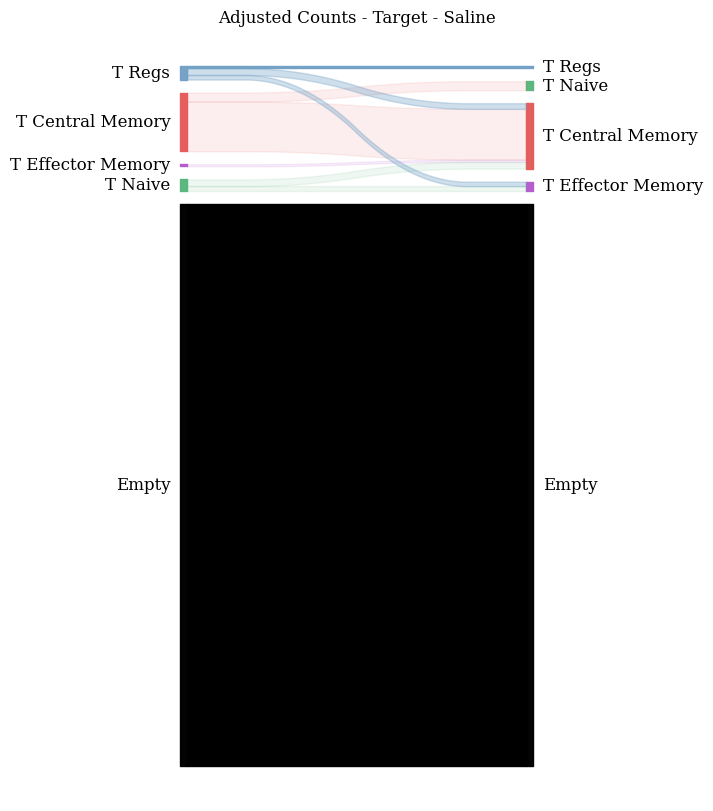

In [58]:
plt.figure(figsize=(5,10))
ax = plt.axes()
sankey(
        left=Saline_equal['pre_type'].values[0:], 
        leftWeight=Saline_equal['adjusted_pre_clono_cells'].values[0:],
        

        right=Saline_equal['post_type'].values[0:], 
        rightWeight=Saline_equal['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Adjusted Counts - Target - Saline")

plt.show()

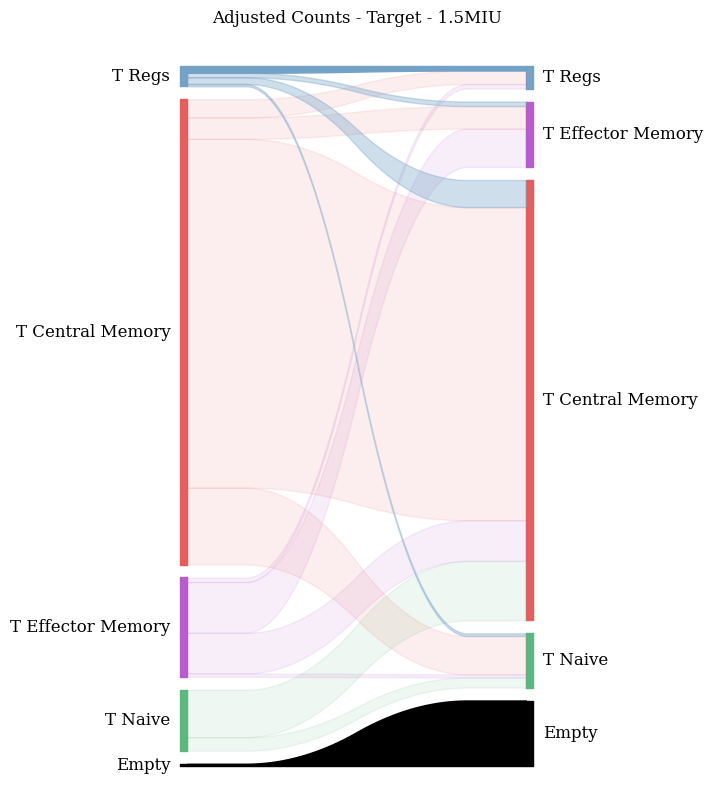

In [59]:
plt.figure(figsize=(5,10))
ax = plt.axes()
sankey(
        left=T15_equal['pre_type'].values[0:], 
        leftWeight=T15_equal['adjusted_pre_clono_cells'].values[0:],
        

        right=T15_equal['post_type'].values[0:], 
        rightWeight=T15_equal['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Adjusted Counts - Target - 1.5MIU")

plt.show()

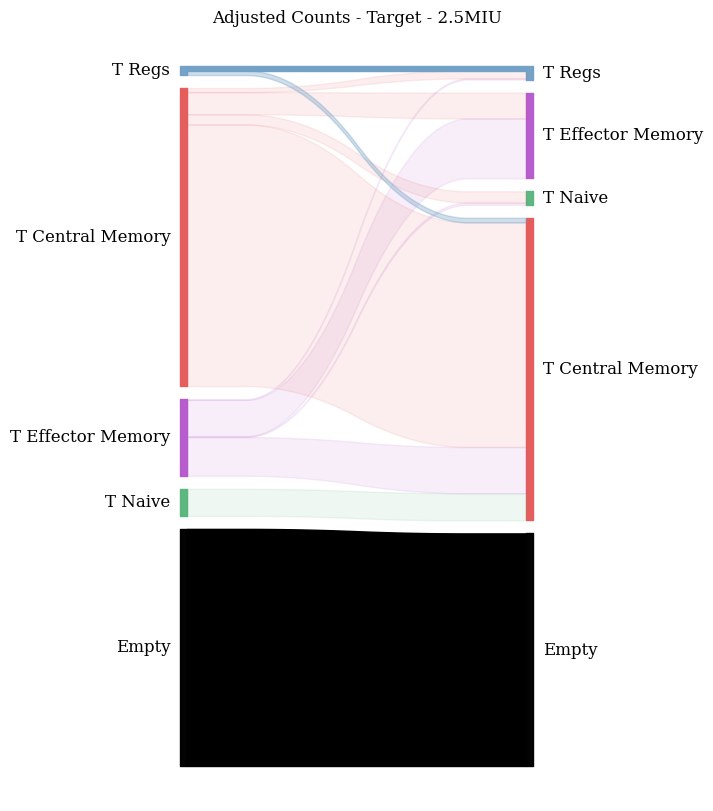

In [60]:
plt.figure(figsize=(5,10))
ax = plt.axes()
sankey(
        left=T25_equal['pre_type'].values[0:], 
        leftWeight=T25_equal['adjusted_pre_clono_cells'].values[0:],
        

        right=T25_equal['post_type'].values[0:], 
        rightWeight=T25_equal['adjusted_post_clono_cells'].values[0:],
        

        color_gradient=False,
        colorDict=color_dict,
        alphaDict = alpha_dict,

        aspect=20,
        fontsize=12, 
        ax=ax)
plt.title("Adjusted Counts - Target - 2.5MIU")

plt.show()

## Tables

In [61]:
#Saline Summary Table
df = Saline_updated

# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('Saline Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,26,68.42%,29,76.32%
1,T Effector Memory,1,2.63%,4,10.53%
2,T Naive,5,13.16%,4,10.53%
3,T Regs,6,15.79%,1,2.63%


In [62]:
# 1.5MIU Summary Table
df = T15_updated

# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('1.5 MIU Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,206,72.03%,195,75.58%
1,T Effector Memory,44,15.38%,29,11.24%
2,T Naive,27,9.44%,24,9.3%
3,T Regs,9,3.15%,10,3.88%


In [63]:
# 2.5 MIU Summary Table:
df = T25_updated

# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('2.5 MIU Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,132,72.53%,134,72.83%
1,T Effector Memory,34,18.68%,38,20.65%
2,T Naive,12,6.59%,6,3.26%
3,T Regs,4,2.2%,6,3.26%


In [64]:
# Saline Treg Summary Table:
df = Saline_regs

# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

#Saline Treg has cells in post Tem but not in the pre timepoint - results in NaN - update text:
summary_table.loc[1,"Cell Type"] = "T Effector Memory"
summary_table.loc[1,"Pre Count"] = 0
summary_table.loc[1,"Pre Proportion"] = "0%"

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('Saline Treg Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,1,14.29%,3,50.0%
1,T Effector Memory,0,0%,2,33.33%
2,T Regs,6,85.71%,1,16.67%


In [65]:
# 1.5MIU Treg Summary Table:
df = T15_regs

# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('1.5MIU Treg Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,35,71.43%,28,63.64%
1,T Effector Memory,4,8.16%,3,6.82%
2,T Naive,1,2.04%,3,6.82%
3,T Regs,9,18.37%,10,22.73%


In [66]:
# 2.5MIU Treg Summary Table:
df = T25_regs

# Group by pre_type to get the sum of adjusted_pre_clono_cells
pre_summary = df.groupby('pre_type')['adjusted_pre_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in pre
pre_summary['pre_proportion'] = pre_summary['adjusted_pre_clono_cells'] / pre_summary['adjusted_pre_clono_cells'].sum()

# Group by post_type to get the sum of adjusted_post_clono_cells
post_summary = df.groupby('post_type')['adjusted_post_clono_cells'].sum().reset_index()
# Add a column for the proportion of each cell type in post
post_summary['post_proportion'] = post_summary['adjusted_post_clono_cells'] / post_summary['adjusted_post_clono_cells'].sum()

# Merge the two summaries into a single table
summary_table = pd.merge(pre_summary, post_summary, left_on='pre_type', right_on='post_type', how='outer', suffixes=('_pre', '_post'))
# Clean up the resulting table (optional: drop redundant 'post_type' column)
summary_table = summary_table.drop(columns=['post_type'])

# Format the proportion columns as percentages with two decimal points
summary_table['pre_proportion'] = (summary_table['pre_proportion'] * 100).round(2).astype(str) + '%'
summary_table['post_proportion'] = (summary_table['post_proportion'] * 100).round(2).astype(str) + '%'

#Rename columns:
summary_table = summary_table.set_axis(['Cell Type','Pre Count','Pre Proportion', 'Post Count','Post Proportion'], axis=1)

# Display the final summary table
pd.DataFrame(summary_table).style.format({'Pre Count': '{:.0f}',
                                          'Post Count': '{:.0f}',}).set_caption('2.5MIU Treg Summary Table')

,Cell Type,Pre Count,Pre Proportion,Post Count,Post Proportion
0,T Central Memory,3,37.5%,4,36.36%
1,T Effector Memory,1,12.5%,1,9.09%
2,T Regs,4,50.0%,6,54.55%
